# SQL for Data Analytics Tutorial 1 - working with Titanic Dataset and Pandas

Let us start by running SQL within Python. Begin by installing "pandasql" module. 

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U pandasql

Now that the pandas sql has installed, read the input dataset, in this case we make use of titanic dataset

In [6]:
import pandas as pd
import pandasql as ps

In [7]:
titanic_disaster_dataset = pd.read_csv("titanic.csv")
print(titanic_disaster_dataset.shape, titanic_disaster_dataset[['PassengerId']].drop_duplicates().shape)
titanic_disaster_dataset.head()

(891, 12) (891, 1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The below SQL code is the one written in between three double quotes

In [8]:
#Giving an alias name to the dataset and using it in "SELECT" statement too
ps.sqldf("""

SELECT 
    df.* 
FROM titanic_disaster_dataset AS df

""")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,None,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
#Using "LIMIT" to get top 5 rows
ps.sqldf("""

SELECT 
    df.*  
FROM titanic_disaster_dataset AS df
LIMIT 5

""")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


In [10]:
#Taking only Passenger ID and the name from the dataset
ps.sqldf("""

SELECT 
    PassengerId,
    Name
FROM titanic_disaster_dataset
LIMIT 5

""")

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,"Allen, Mr. William Henry"


The above query and its results is same as below -

In [11]:
#Taking only Passenger ID and the name from the dataset
ps.sqldf("""

SELECT 
    df.PassengerId,
    df.Name
FROM titanic_disaster_dataset AS df
LIMIT 5

""")

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,"Allen, Mr. William Henry"


In [12]:
#Taking only Passenger ID and name from the dataset and also renaming the two chosen columns
ps.sqldf("""

SELECT 
    df.PassengerId AS ID_of_Passenger,
    df.Name AS Name_of_Passenger
FROM titanic_disaster_dataset AS df
LIMIT 5

""")

,ID_of_Passenger,Name_of_Passenger
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,"Allen, Mr. William Henry"


In [13]:
#Selecting everything from the dataset for passengers whose age is below 1 year
ps.sqldf("""

SELECT 
    df.*
FROM titanic_disaster_dataset AS df
WHERE df.age < 1

""")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,None,S
1,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,None,C
3,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,None,C
4,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,None,S
5,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,None,C
6,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,None,S


In [14]:
#You can check for missing values by using "IS NULL"
ps.sqldf("""

SELECT 
    df.*
FROM titanic_disaster_dataset AS df
WHERE df.age IS NULL

""")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None,Q
1,18,1,2,"Williams, Mr. Charles Eugene",male,None,0,0,244373,13.0000,None,S
2,20,1,3,"Masselmani, Mrs. Fatima",female,None,0,0,2649,7.2250,None,C
3,27,0,3,"Emir, Mr. Farred Chehab",male,None,0,0,2631,7.2250,None,C
4,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,None,0,0,330959,7.8792,None,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
172,860,0,3,"Razi, Mr. Raihed",male,None,0,0,2629,7.2292,None,C
173,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,None,8,2,CA. 2343,69.5500,None,S
174,869,0,3,"van Melkebeke, Mr. Philemon",male,None,0,0,345777,9.5000,None,S
175,879,0,3,"Laleff, Mr. Kristo",male,None,0,0,349217,7.8958,None,S


In [15]:
#You can get non-null rows by using "IS NOT NULL"
ps.sqldf("""

SELECT 
    df.*
FROM titanic_disaster_dataset AS df
WHERE df.age IS NOT NULL

""")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,None,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
#Example for "BETWEEN" keyword
ps.sqldf("""

SELECT 
    df.*
FROM titanic_disaster_dataset AS df
WHERE df.age BETWEEN 5 AND 10

""")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,None,S
1,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,None,S
2,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,None,S
3,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,None,S
4,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,None,S
5,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,None,S
6,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,None,S
7,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.2500,None,S
8,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,None,Q
9,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,None,S


In [17]:
#Selecting everything from the dataset for passengers whose age is below 1 year and who are females
ps.sqldf("""

SELECT 
    df.*
FROM titanic_disaster_dataset AS df
WHERE df.age < 1
    AND df.Sex = "female"
    
""")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,None,C
1,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,None,C


In [18]:
#Selecting everything from the dataset for passengers where (age is below 1 year and sex is female) OR
#(age is above 70 year and Pclass is 1)
ps.sqldf("""

SELECT 
    df.*
FROM titanic_disaster_dataset AS df
WHERE (df.age < 1 AND df.Sex = "female")
    OR (df.age > 70 AND df.Pclass = 1)
    
""")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C
1,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,None,C
2,494,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,None,C
3,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S
4,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,None,C


In [19]:
#Selecting everything from the dataset for passengers where Cabin is one of A5, A6, A7
ps.sqldf("""

SELECT 
    df.*
FROM titanic_disaster_dataset AS df
WHERE df.Cabin IN ('A5', 'A6', 'A7')
    
""")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
1,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
2,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C


In [20]:
#Selecting everything from the dataset for passengers where Age is one of 65, 70, 71
ps.sqldf("""

SELECT 
    df.*
FROM titanic_disaster_dataset AS df
WHERE df.Age IN (65, 70, 71)
    
""")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
1,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
2,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,None,Q
3,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
4,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,None,C
5,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,None,S
6,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [21]:
#Selecting everything from the dataset for passengers where name contains 'Mrs.'
ps.sqldf("""

SELECT 
    df.*
FROM titanic_disaster_dataset AS df
WHERE df.Name LIKE "%MRS.%"
LIMIT 5

""")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,None,S
3,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,None,C
4,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,None,S


In [22]:
#Adding a column for Square, +1 etc of 
ps.sqldf("""

SELECT 
    df.Age,
    df.Age * df.Age AS age_sq,
    df.Age + 1 AS age_plus_one
FROM titanic_disaster_dataset AS df
LIMIT 5    
    
""")

,Age,age_sq,age_plus_one
0,22.0,484.0,23.0
1,38.0,1444.0,39.0
2,26.0,676.0,27.0
3,35.0,1225.0,36.0
4,35.0,1225.0,36.0


In [23]:
#Concatenating Sex and Ticket
ps.sqldf("""

SELECT 
    df.Sex,
    df.Ticket,
    df.Sex || df.Ticket AS Sex_Plus_ticket
FROM titanic_disaster_dataset AS df
LIMIT 5    
    
""")

,Sex,Ticket,Sex_Plus_ticket
0,male,A/5 21171,maleA/5 21171
1,female,PC 17599,femalePC 17599
2,female,STON/O2. 3101282,femaleSTON/O2. 3101282
3,female,113803,female113803
4,male,373450,male373450


In [24]:
#Using CASE WHEN to create buckets for age
ps.sqldf("""

SELECT 
    df.Name,
    df.PassengerID,
    df.Age,
    CASE WHEN df.Age IS NULL THEN '0. Missing'
        WHEN df.Age <18 THEN '1. 1-17'
        WHEN df.Age <60 THEN '2. 18-60'
    ELSE '3. 60+' END AS age_bucket
FROM titanic_disaster_dataset AS df
LIMIT 50   
    
""")

,Name,PassengerId,Age,age_bucket
0,"Braund, Mr. Owen Harris",1,22.0,2. 18-60
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,2. 18-60
2,"Heikkinen, Miss. Laina",3,26.0,2. 18-60
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,35.0,2. 18-60
4,"Allen, Mr. William Henry",5,35.0,2. 18-60
5,"Moran, Mr. James",6,NaN,0. Missing
6,"McCarthy, Mr. Timothy J",7,54.0,2. 18-60
7,"Palsson, Master. Gosta Leonard",8,2.0,1. 1-17
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,27.0,2. 18-60
9,"Nasser, Mrs. Nicholas (Adele Achem)",10,14.0,1. 1-17


In [25]:
#Using SUBSTR() to take out a substring
ps.sqldf("""

SELECT 
    df.Name,
    SUBSTR(df.Name,2, 4) AS out
FROM titanic_disaster_dataset AS df
LIMIT 5
    
""")

,Name,out
0,"Braund, Mr. Owen Harris",raun
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",umin
2,"Heikkinen, Miss. Laina",eikk
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",utre
4,"Allen, Mr. William Henry",llen


In [26]:
#Using LOWER() and UPPER() to convert text to lower and upper case
ps.sqldf("""

SELECT 
    df.Name,
    LOWER(df.Name) AS lcase_name,
    UPPER(df.Name) AS ucase_name
FROM titanic_disaster_dataset AS df
LIMIT 5
    
""")

,Name,lcase_name,ucase_name
0,"Braund, Mr. Owen Harris","braund, mr. owen harris","BRAUND, MR. OWEN HARRIS"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...","cumings, mrs. john bradley (florence briggs th...","CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH..."
2,"Heikkinen, Miss. Laina","heikkinen, miss. laina","HEIKKINEN, MISS. LAINA"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)","futrelle, mrs. jacques heath (lily may peel)","FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)"
4,"Allen, Mr. William Henry","allen, mr. william henry","ALLEN, MR. WILLIAM HENRY"


In [27]:
#Getting all distinct values of "Embarked" column
ps.sqldf("""

SELECT 
    DISTINCT df.Embarked
FROM titanic_disaster_dataset AS df
    
""")

,Embarked
0,S
1,C
2,Q
3,None


SQL provides multiple ways in which you can aggregate information at different levels. You will need to use "GROUP BY" in the end and specify on which column(s) you are aggregating the data

In [28]:
ps.sqldf("""

SELECT 
    df.Embarked,
    AVG(df.Age) AS avg_age,
    SUM(df.Age) AS tot_age,
    MIN(df.Age) AS min_age,
    MAX(df.Age) AS max_age,
    COUNT(df.PassengerId) AS tot_passengers,
    COUNT(DISTINCT df.Ticket) AS dist_tickets
FROM titanic_disaster_dataset AS df
GROUP BY df.Embarked

""")

,Embarked,avg_age,tot_age,min_age,max_age,tot_passengers,dist_tickets
0,None,50.000000,100.00,38.00,62.0,2,1
1,C,30.814769,4005.92,0.42,71.0,168,122
2,Q,28.089286,786.50,2.00,70.5,77,66
3,S,29.445397,16312.75,0.67,80.0,644,494


In [29]:
#Aggregating information at "Embarked" and "Sex" levels
ps.sqldf("""

SELECT 
    df.Embarked,
    df.Sex,
    AVG(df.Age) AS avg_age,
    SUM(df.Age) AS tot_age,
    MIN(df.Age) AS min_age,
    MAX(df.Age) AS max_age,
    COUNT(df.PassengerId) AS tot_passengers,
    COUNT(DISTINCT df.Ticket) AS dist_tickets
    
FROM titanic_disaster_dataset AS df
GROUP BY df.Embarked,
    df.Sex

""")

,Embarked,Sex,avg_age,tot_age,min_age,max_age,tot_passengers,dist_tickets
0,None,female,50.000000,100.00,38.00,62.0,2,1
1,C,female,28.344262,1729.00,0.75,60.0,73,54
2,C,male,32.998841,2276.92,0.42,71.0,95,88
3,Q,female,24.291667,291.50,15.00,39.0,36,35
4,Q,male,30.937500,495.00,2.00,70.5,41,37
5,S,female,27.771505,5165.50,1.00,63.0,203,158
6,S,male,30.291440,11147.25,0.67,80.0,441,394


In [30]:
#Aggregating information at "Embarked" and "Sex" levels 
#and also using "WHERE" to filter basis some conditions
ps.sqldf("""

SELECT 
    df.Embarked,
    df.Sex,
    AVG(df.Age) AS avg_age,
    SUM(df.Age) AS tot_age,
    MIN(df.Age) AS min_age,
    MAX(df.Age) AS max_age,
    COUNT(df.PassengerId) AS tot_passengers,
    COUNT(DISTINCT df.Ticket) AS dist_tickets
FROM titanic_disaster_dataset AS df

WHERE age >= 18
    AND age <=60
    
GROUP BY df.Embarked,
    df.Sex

""")

,Embarked,Sex,avg_age,tot_age,min_age,max_age,tot_passengers,dist_tickets
0,None,female,38.000000,38.0,38.0,38.0,1,1
1,C,female,35.295455,1553.0,18.0,60.0,44,35
2,C,male,33.838983,1996.5,18.0,60.0,59,56
3,Q,female,27.166667,244.5,18.0,39.0,9,9
4,Q,male,33.850000,338.5,19.0,57.0,10,10
5,S,female,31.909396,4754.5,18.0,58.0,149,136
6,S,male,31.941368,9806.0,18.0,60.0,307,292


In [31]:
#Aggregating information at "Embarked" and "Sex" levels 
#and also using "WHERE" to filter basis some conditions
#and also sorting the output
ps.sqldf("""

SELECT 
    df.Embarked,
    df.Sex,
    AVG(df.Age) AS avg_age,
    SUM(df.Age) AS tot_age,
    MIN(df.Age) AS min_age,
    MAX(df.Age) AS max_age,
    COUNT(df.PassengerId) AS tot_passengers,
    COUNT(DISTINCT df.Ticket) AS dist_tickets
    
FROM titanic_disaster_dataset AS df

WHERE age >= 18
    AND age <=60
    
GROUP BY df.Embarked,
    df.Sex

ORDER BY df.Embarked,
    df.Sex

""")

,Embarked,Sex,avg_age,tot_age,min_age,max_age,tot_passengers,dist_tickets
0,None,female,38.000000,38.0,38.0,38.0,1,1
1,C,female,35.295455,1553.0,18.0,60.0,44,35
2,C,male,33.838983,1996.5,18.0,60.0,59,56
3,Q,female,27.166667,244.5,18.0,39.0,9,9
4,Q,male,33.850000,338.5,19.0,57.0,10,10
5,S,female,31.909396,4754.5,18.0,58.0,149,136
6,S,male,31.941368,9806.0,18.0,60.0,307,292


In [32]:
#Aggregating information at "Embarked" and "Sex" levels 
#and also using "WHERE" to filter basis some conditions
#and also sorting the output in descending order
ps.sqldf("""

SELECT 
    df.Embarked,
    df.Sex,
    AVG(df.Age) AS avg_age,
    SUM(df.Age) AS tot_age,
    MIN(df.Age) AS min_age,
    MAX(df.Age) AS max_age,
    COUNT(df.PassengerId) AS tot_passengers,
    COUNT(DISTINCT df.Ticket) AS dist_tickets
    
FROM titanic_disaster_dataset AS df

WHERE age >= 18
    AND age <=60
    
GROUP BY df.Embarked,
    df.Sex

ORDER BY df.Embarked DESC,
    df.Sex DESC

""")

,Embarked,Sex,avg_age,tot_age,min_age,max_age,tot_passengers,dist_tickets
0,S,male,31.941368,9806.0,18.0,60.0,307,292
1,S,female,31.909396,4754.5,18.0,58.0,149,136
2,Q,male,33.850000,338.5,19.0,57.0,10,10
3,Q,female,27.166667,244.5,18.0,39.0,9,9
4,C,male,33.838983,1996.5,18.0,60.0,59,56
5,C,female,35.295455,1553.0,18.0,60.0,44,35
6,None,female,38.000000,38.0,38.0,38.0,1,1


Once the aggregated info is available, filters can be further applied on the aggregated output using "HAVING".
Difference between WHERE and HAVING  -  "WHERE" is used to filter the data directly from the tables while "HAVING" is used to filter the aggregated data you get as the output of a SQL
Remember the order - First "WHERE", then "GROUP BY", then "HAVING" and lastly "ORDER BY"

In [33]:
#Aggregating information at "Embarked" and "Sex" levels 
#and also using "WHERE" to filter basis some conditions
#and also using "HAVING" for fitering the output for buckets where average age is more than 30
#and also using "ORDER BY" for sorting the output in descending order
ps.sqldf("""

SELECT 
    df.Embarked,
    df.Sex,
    AVG(df.Age) AS avg_age,
    SUM(df.Age) AS tot_age,
    MIN(df.Age) AS min_age,
    MAX(df.Age) AS max_age,
    COUNT(df.PassengerId) AS tot_passengers,
    COUNT(DISTINCT df.Ticket) AS dist_tickets
    
FROM titanic_disaster_dataset AS df

WHERE age >= 18
    AND age <=60
    
GROUP BY df.Embarked,
    df.Sex

HAVING avg_age > 30

ORDER BY df.Embarked DESC,
    df.Sex DESC

""")

,Embarked,Sex,avg_age,tot_age,min_age,max_age,tot_passengers,dist_tickets
0,S,male,31.941368,9806.0,18.0,60.0,307,292
1,S,female,31.909396,4754.5,18.0,58.0,149,136
2,Q,male,33.850000,338.5,19.0,57.0,10,10
3,C,male,33.838983,1996.5,18.0,60.0,59,56
4,C,female,35.295455,1553.0,18.0,60.0,44,35
5,None,female,38.000000,38.0,38.0,38.0,1,1


JOINS -  "JOIN"s in SQL gets data from multiple dataset . 

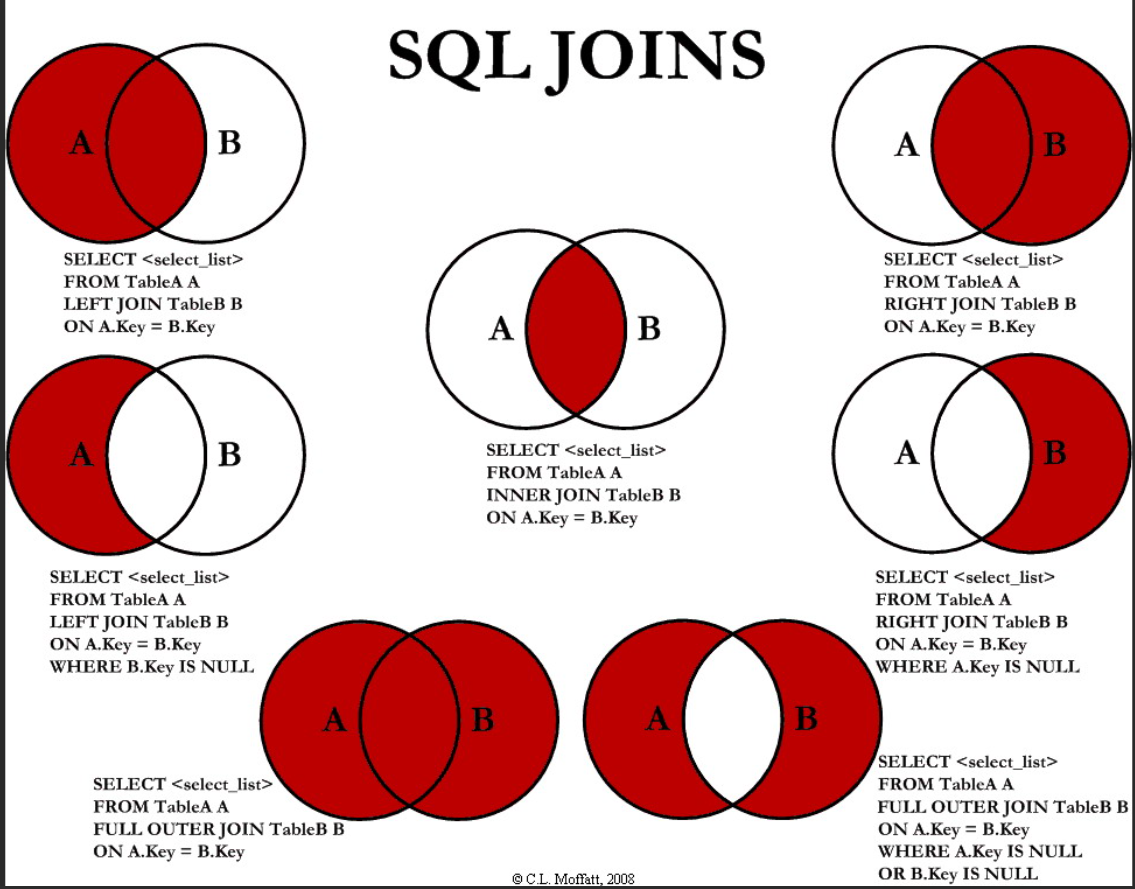

Before joining any two tables, it is important to understand the data in the tables. Study the data will ensure that meaningful joins are created. Study the levels/columns at which the data is unique in both the tables. For example, the titanic dataset above is unique at "PassengerId" column and cities data is unique at "code" column level. Not understanding the uniqueness of the data is a leading cause of incorrect results in SQL. 

In [35]:
cities = pd.DataFrame({'code':['S', 'C', 'L'],'city':['Southampton', 'Cherbourg', 'London']})
cities

,code,city
0,S,Southampton
1,C,Cherbourg
2,L,London


In [36]:
ps.sqldf("""

SELECT 
    c.city,
    df.Embarked,
    df.Sex,
    AVG(df.Age) AS avg_age,
    SUM(df.Age) AS tot_age,
    MIN(df.Age) AS min_age,
    MAX(df.Age) AS max_age,
    COUNT(df.PassengerId) AS tot_passengers,
    COUNT(DISTINCT df.Ticket) AS dist_tickets
    
FROM titanic_disaster_dataset AS df

INNER JOIN cities AS c
    ON df.Embarked = c.code

GROUP BY df.Embarked,
    df.Sex

""")

,city,Embarked,Sex,avg_age,tot_age,min_age,max_age,tot_passengers,dist_tickets
0,Cherbourg,C,female,28.344262,1729.00,0.75,60.0,73,54
1,Cherbourg,C,male,32.998841,2276.92,0.42,71.0,95,88
2,Southampton,S,female,27.771505,5165.50,1.00,63.0,203,158
3,Southampton,S,male,30.291440,11147.25,0.67,80.0,441,394


As you can see, using INNER JOIN we get only the common elements - "S" and "C", but not "L"(present only in "cities") and "Q"(present only in "titanic_disaster_dataset")

In [37]:
ps.sqldf("""

SELECT 
    c.city,
    df.Embarked,
    df.Sex,
    AVG(df.Age) AS avg_age,
    SUM(df.Age) AS tot_age,
    MIN(df.Age) AS min_age,
    MAX(df.Age) AS max_age,
    COUNT(df.PassengerId) AS tot_passengers,
    COUNT(DISTINCT df.Ticket) AS dist_tickets
    
FROM titanic_disaster_dataset AS df

LEFT JOIN cities AS c
    ON df.Embarked = c.code

GROUP BY df.Embarked,
    df.Sex

""")

,city,Embarked,Sex,avg_age,tot_age,min_age,max_age,tot_passengers,dist_tickets
0,None,None,female,50.000000,100.00,38.00,62.0,2,1
1,Cherbourg,C,female,28.344262,1729.00,0.75,60.0,73,54
2,Cherbourg,C,male,32.998841,2276.92,0.42,71.0,95,88
3,None,Q,female,24.291667,291.50,15.00,39.0,36,35
4,None,Q,male,30.937500,495.00,2.00,70.5,41,37
5,Southampton,S,female,27.771505,5165.50,1.00,63.0,203,158
6,Southampton,S,male,30.291440,11147.25,0.67,80.0,441,394


As you can see, using LEFT JOIN we get all the rows from the left table("S", "Q", "C" - all are present in the output), but only for "C" and "S", we are getting "city" from the right table

In [38]:
ps.sqldf("""

SELECT 
    c.city,
    df.Embarked,
    df.Sex,
    AVG(df.Age) AS avg_age,
    SUM(df.Age) AS tot_age,
    MIN(df.Age) AS min_age,
    MAX(df.Age) AS max_age,
    COUNT(df.PassengerId) AS tot_passengers,
    COUNT(DISTINCT df.Ticket) AS dist_tickets
    
FROM cities AS c

LEFT JOIN titanic_disaster_dataset AS df
    ON df.Embarked = c.code

GROUP BY df.Embarked,
    df.Sex

""")

,city,Embarked,Sex,avg_age,tot_age,min_age,max_age,tot_passengers,dist_tickets
0,London,None,None,NaN,NaN,NaN,NaN,0,0
1,Cherbourg,C,female,28.344262,1729.00,0.75,60.0,73,54
2,Cherbourg,C,male,32.998841,2276.92,0.42,71.0,95,88
3,Southampton,S,female,27.771505,5165.50,1.00,63.0,203,158
4,Southampton,S,male,30.291440,11147.25,0.67,80.0,441,394


RIGHT JOIN is the mirror opposite of LEFT JOIN. RIGHT JOIN gives all rows from the right table and only those rows from left table where the values are common in the columns used in right join condition.
Unfortunately "RIGHT JOIN" is not supported by pandasql. But we can see the output of RIGHT JOIN by swapping the tables in the LEFT JOIN query above. Here is how it will look like above

FULL JOIN gives all rows from the from both tables, irrespective of common values
Unfortunately "FULL JOIN" is not supported by pandasql. But here is how the output will look like if you ran a FULL join on the two datasets we have -

In [39]:
#sample output for FULL JOIN
pd.merge(titanic_disaster_dataset.groupby('Embarked')['Age'].mean().reset_index(), 
         cities.rename({'code':'Embarked'}, axis = 'columns'), 
         on='Embarked', 
         how='outer')

,Embarked,Age,city
0,C,30.814769,Cherbourg
1,Q,28.089286,NaN
2,S,29.445397,Southampton
3,L,NaN,London


Union and Union All
If there are two datasets with exact same columns and needs to be stacked one on top of another and get all the distinct rows, use "UNION" statement. Each SELECT statement within the UNION must have the same number of fields in the result sets with similar data types, as shown below -

In [40]:
#Using "UNION" to stack datasets
ps.sqldf("""

SELECT DISTINCT df.Embarked FROM titanic_disaster_dataset AS df
UNION
SELECT DISTINCT c.code FROM cities AS c

""")

,Embarked
0,None
1,C
2,L
3,Q
4,S


"UNION" gives only the distinct rows after stacking. If distinct rows are not required, go for  "UNION ALL", which will simply stack the two tables one over another

In [41]:
#Using "UNION ALL" to stack datasets
ps.sqldf("""

SELECT DISTINCT df.Embarked FROM titanic_disaster_dataset AS df
UNION ALL
SELECT DISTINCT c.code FROM cities AS c

""")

,Embarked
0,S
1,C
2,Q
3,None
4,S
5,C
6,L


Minus or Except
While "UNION" combines the datasets, "MINUS" or "EXCEPT" (only in some SQL dialects) gives the rows from the first dataset which are not present in the second one. pandasql uses "EXCEPT" keyword. Here are two examples -

In [42]:
#Using "EXCEPT" to take rows from first dataset and then remove rows which are present in both datasets
ps.sqldf("""

SELECT DISTINCT df.Embarked FROM titanic_disaster_dataset AS df
EXCEPT
SELECT DISTINCT c.code FROM cities AS c

""")

,Embarked
0,None
1,Q


In [43]:
#Using "EXCEPT" to take rows from first dataset and then remove rows which are present in both datasets
ps.sqldf("""

SELECT DISTINCT c.code FROM cities AS c
EXCEPT
SELECT DISTINCT df.Embarked FROM titanic_disaster_dataset AS df

""")

,code
0,L


Ranking in SQL
There are lot times when there is need to sort data and give a rank to each row in the dataset. RANK(), DENSE_RANK() and ROW_NUMBERS() are three functions which do that. These functions are used with OVER() function to sort the data based on some column before giving rank to each row and also to partition the data.

RANK() provides a rank to each row. If any n rows have the same value in the sorting column, then RANK() gives the same value to all of these rows. For the next row where the value is different than the previous n rows, the rank given will be previous rank plus n. Here is an example -

In [44]:
#RANK() sorts the data, gives the same rank to all consecutive n rows with same values, 
#but for next row with a different value, it gives a rank equal to previous rank plus n
ps.sqldf("""

SELECT 
    df.Name,
    df.Embarked,
    df.Sex,
    df.Age,
    df.Fare,
    RANK() OVER(ORDER BY df.Age DESC) AS rnk
FROM titanic_disaster_dataset AS df

""")

,Name,Embarked,Sex,Age,Fare,rnk
0,"Barkworth, Mr. Algernon Henry Wilson",S,male,80.0,30.0000,1
1,"Svensson, Mr. Johan",S,male,74.0,7.7750,2
2,"Goldschmidt, Mr. George B",C,male,71.0,34.6542,3
3,"Artagaveytia, Mr. Ramon",C,male,71.0,49.5042,3
4,"Connors, Mr. Patrick",Q,male,70.5,7.7500,5
...,...,...,...,...,...,...
886,"Razi, Mr. Raihed",C,male,NaN,7.2292,715
887,"Sage, Miss. Dorothy Edith ""Dolly""",S,female,NaN,69.5500,715
888,"van Melkebeke, Mr. Philemon",S,male,NaN,9.5000,715
889,"Laleff, Mr. Kristo",S,male,NaN,7.8958,715


From above, it is clear that "OVER(ORDER BY df.Age DESC)" orders Age in descending order and then Rank() is used to assign a rank to each row. Notice row 3 and 4, where the age values are the same(i.e. 71) and hence both rows have the same rank(=3). In row 5, the ranking begins from 5(=previous rank 3 plus 2) and not 4.


So by using RANK() there are some ranks which get skipped if there are same values in the sorting order. Using DENSE_RANK() we can ensure that no ranks are skipped. Notice in the example below where row 5 has a rank 4 and not 5.

In [45]:
#DENSE_RANK() does not skip ranks like RANK() does
ps.sqldf("""

SELECT 
    df.Name,
    df.Embarked,
    df.Sex,
    df.Age,
    df.Fare,
    DENSE_RANK() OVER(ORDER BY df.Age DESC) AS rnk
    
FROM titanic_disaster_dataset AS df

""")

,Name,Embarked,Sex,Age,Fare,rnk
0,"Barkworth, Mr. Algernon Henry Wilson",S,male,80.0,30.0000,1
1,"Svensson, Mr. Johan",S,male,74.0,7.7750,2
2,"Goldschmidt, Mr. George B",C,male,71.0,34.6542,3
3,"Artagaveytia, Mr. Ramon",C,male,71.0,49.5042,3
4,"Connors, Mr. Patrick",Q,male,70.5,7.7500,4
...,...,...,...,...,...,...
886,"Razi, Mr. Raihed",C,male,NaN,7.2292,89
887,"Sage, Miss. Dorothy Edith ""Dolly""",S,female,NaN,69.5500,89
888,"van Melkebeke, Mr. Philemon",S,male,NaN,9.5000,89
889,"Laleff, Mr. Kristo",S,male,NaN,7.8958,89


And then we have ROW_NUMBER() which gives different rank to each row even if the sorted values are same. Notice below how in row 3 and 4 age is same but the ranks are different.

In [46]:
#ROW_NUMBER() sorts the data and gives different ranks to each row 
ps.sqldf("""

SELECT 
    df.Name,
    df.Embarked,
    df.Sex,
    df.Age,
    df.Fare,
    ROW_NUMBER() OVER(ORDER BY df.Age DESC) AS rnk
    
FROM titanic_disaster_dataset AS df

""")

,Name,Embarked,Sex,Age,Fare,rnk
0,"Barkworth, Mr. Algernon Henry Wilson",S,male,80.0,30.0000,1
1,"Svensson, Mr. Johan",S,male,74.0,7.7750,2
2,"Goldschmidt, Mr. George B",C,male,71.0,34.6542,3
3,"Artagaveytia, Mr. Ramon",C,male,71.0,49.5042,4
4,"Connors, Mr. Patrick",Q,male,70.5,7.7500,5
...,...,...,...,...,...,...
886,"Razi, Mr. Raihed",C,male,NaN,7.2292,887
887,"Sage, Miss. Dorothy Edith ""Dolly""",S,female,NaN,69.5500,888
888,"van Melkebeke, Mr. Philemon",S,male,NaN,9.5000,889
889,"Laleff, Mr. Kristo",S,male,NaN,7.8958,890


In [47]:
#You can use multiple columns to sort the data within OVER() function
ps.sqldf("""

SELECT 
    df.Name,
    df.Embarked,
    df.Sex,
    df.Age,
    df.Fare,
    RANK() OVER(ORDER BY df.Age DESC, df.Fare ASC) AS rnk
    
FROM titanic_disaster_dataset AS df

""")

,Name,Embarked,Sex,Age,Fare,rnk
0,"Barkworth, Mr. Algernon Henry Wilson",S,male,80.0,30.0000,1
1,"Svensson, Mr. Johan",S,male,74.0,7.7750,2
2,"Goldschmidt, Mr. George B",C,male,71.0,34.6542,3
3,"Artagaveytia, Mr. Ramon",C,male,71.0,49.5042,4
4,"Connors, Mr. Patrick",Q,male,70.5,7.7500,5
...,...,...,...,...,...,...
886,"Fleming, Miss. Margaret",C,female,NaN,110.8833,887
887,"Frauenthal, Mrs. Henry William (Clara Heinshei...",S,female,NaN,133.6500,888
888,"Spencer, Mrs. William Augustus (Marie Eugenie)",C,female,NaN,146.5208,889
889,"Farthing, Mr. John",S,male,NaN,221.7792,890


Further, OVER() also supports partitioning of data. In order to give separate ranks within specific levels of data, then use "PARTITION BY" in OVER() function. In the example below, for each combination of df.Embarked and df.Sex, we will get different sets of ranks.

In [48]:
#Using PARTITION BY to create buckets for giving separate sets of ranks
ps.sqldf("""

SELECT 
    df.Name,
    df.Embarked,
    df.Sex,
    df.Age,
    df.Fare,
    RANK() OVER(PARTITION BY df.Embarked, df.Sex 
                ORDER BY df.Age DESC, df.Fare DESC) AS rnk
    
FROM titanic_disaster_dataset AS df

""")

,Name,Embarked,Sex,Age,Fare,rnk
0,"Stone, Mrs. George Nelson (Martha Evelyn)",None,female,62.0,80.0000,1
1,"Icard, Miss. Amelie",None,female,38.0,80.0000,2
2,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",C,female,60.0,75.2500,1
3,"Lurette, Miss. Elise",C,female,58.0,146.5208,2
4,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",C,female,56.0,83.1583,3
...,...,...,...,...,...,...
886,"Frost, Mr. Anthony Wood ""Archie""",S,male,NaN,0.0000,434
887,"Parr, Mr. William Henry Marsh",S,male,NaN,0.0000,434
888,"Watson, Mr. Ennis Hastings",S,male,NaN,0.0000,434
889,"Knight, Mr. Robert J",S,male,NaN,0.0000,434


Lead and Lag
LEAD() and LAG() can be used to get the nth previous or nth next value in a column, after sorting the data using OVER()

In [51]:
#Examples for LEAD() and LAG()
ps.sqldf("""

SELECT 
    df.Name,
    LEAD(df.Name, 1) OVER(ORDER BY df.Name) AS next_name,
    LEAD(df.Name, 2) OVER(ORDER BY df.Name) AS second_next_name,
    LAG(df.Name, 1) OVER(ORDER BY df.Name) AS previous_name,
    LAG(df.Name, 2) OVER(ORDER BY df.Name) AS second_previous_name
    
FROM titanic_disaster_dataset AS df

""")

,Name,next_name,second_next_name,previous_name,second_previous_name
0,"Abbing, Mr. Anthony","Abbott, Mr. Rossmore Edward","Abbott, Mrs. Stanton (Rosa Hunt)",None,None
1,"Abbott, Mr. Rossmore Edward","Abbott, Mrs. Stanton (Rosa Hunt)","Abelson, Mr. Samuel","Abbing, Mr. Anthony",None
2,"Abbott, Mrs. Stanton (Rosa Hunt)","Abelson, Mr. Samuel","Abelson, Mrs. Samuel (Hannah Wizosky)","Abbott, Mr. Rossmore Edward","Abbing, Mr. Anthony"
3,"Abelson, Mr. Samuel","Abelson, Mrs. Samuel (Hannah Wizosky)","Adahl, Mr. Mauritz Nils Martin","Abbott, Mrs. Stanton (Rosa Hunt)","Abbott, Mr. Rossmore Edward"
4,"Abelson, Mrs. Samuel (Hannah Wizosky)","Adahl, Mr. Mauritz Nils Martin","Adams, Mr. John","Abelson, Mr. Samuel","Abbott, Mrs. Stanton (Rosa Hunt)"
...,...,...,...,...,...
886,"de Mulder, Mr. Theodore","de Pelsmaeker, Mr. Alfons","del Carlo, Mr. Sebastiano","de Messemaeker, Mrs. Guillaume Joseph (Emma)","Zimmerman, Mr. Leo"
887,"de Pelsmaeker, Mr. Alfons","del Carlo, Mr. Sebastiano","van Billiard, Mr. Austin Blyler","de Mulder, Mr. Theodore","de Messemaeker, Mrs. Guillaume Joseph (Emma)"
888,"del Carlo, Mr. Sebastiano","van Billiard, Mr. Austin Blyler","van Melkebeke, Mr. Philemon","de Pelsmaeker, Mr. Alfons","de Mulder, Mr. Theodore"
889,"van Billiard, Mr. Austin Blyler","van Melkebeke, Mr. Philemon",None,"del Carlo, Mr. Sebastiano","de Pelsmaeker, Mr. Alfons"


Using "PARTITION BY" within OVER() function, you can partition the data and get LEAD() and LAG() of a column within partitions

Subqueries
Subqueries are small queries which are used within a bigger main SQL query. Subqueries store the output of a SQL temporarily and more SQL queries can be written on top of these.
Here are some examples of Subquery -

In [52]:
#Using subqueries to get average age and then filtering only those rows where average age is below 30
ps.sqldf("""

SELECT 

    df1.Embarked,
    df1.avg_age
    
FROM (SELECT 
            a.Embarked, 
            AVG(a.Age) AS avg_age 
        FROM titanic_disaster_dataset AS a
        GROUP BY a.Embarked) AS df1

WHERE df1.avg_age<30
    
""")

,Embarked,avg_age
0,Q,28.089286
1,S,29.445397


Here df1 is a temporary datasest which gets created via a subquery

In [53]:
#Using subqueries to get average age and number of passengers separately and then joining the outputs
ps.sqldf("""

SELECT 
    df1.Embarked,
    df1.avg_age,
    df2.tot_passengers
FROM (SELECT 
            a.Embarked, 
            AVG(a.Age) AS avg_age 
        FROM titanic_disaster_dataset AS a
        GROUP BY a.Embarked) AS df1

INNER JOIN (SELECT 
                b.Embarked, 
                COUNT(b.PassengerID) AS tot_passengers
            FROM titanic_disaster_dataset AS b
            GROUP BY b.Embarked) AS df2
    ON df1.Embarked = df2.Embarked
    
""")

,Embarked,avg_age,tot_passengers
0,C,30.814769,168
1,Q,28.089286,77
2,S,29.445397,644


You can nest subqueries inside other subquery and also use them to filter dataset as seen below -

In [54]:
#Using nested subqueries to filter data
ps.sqldf("""
SELECT b.* FROM titanic_disaster_dataset AS b
WHERE b.Embarked IN 
       (SELECT 
            DISTINCT df1.Embarked
        FROM (SELECT 
                    a.Embarked, 
                    AVG(a.Age) AS avg_age 
                FROM titanic_disaster_dataset AS a
                GROUP BY a.Embarked) AS df1
        WHERE df1.avg_age>30)
    
""")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,None,C
2,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,None,C
3,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,None,C
4,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,None,C
...,...,...,...,...,...,...,...,...,...,...,...,...
163,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,None,C
164,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,None,C
165,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,None,C
166,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


Typecast
You can use CAST() function to change the data type of columns in a dataset. Here are some example -

In [55]:
#Using CAST() to change datatype of columns
ps.sqldf("""

SELECT 
    df.Name,
    df.Fare,
    CAST(df.Fare AS INT) AS integer_fare,
    CAST(CAST(df.Fare AS INT) AS FLOAT) AS float_fare
FROM titanic_disaster_dataset AS df
LIMIT 5
    
""")

,Name,Fare,integer_fare,float_fare
0,"Braund, Mr. Owen Harris",7.2500,7,7.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,71,71.0
2,"Heikkinen, Miss. Laina",7.9250,7,7.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,53,53.0
4,"Allen, Mr. William Henry",8.0500,8,8.0
